In [17]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from pykat import finesse
from pykat.commands import * 
from IPython.display import display, HTML

%matplotlib inline 

pykat.init_pykat_plotting(dpi=90)

In [18]:
kat1 = finesse.kat()
kat1.verbose = False

In [19]:
code = """
# Ex2a.kat 
# Simple cavity, observe transfer function from 
# ETM displacement signal to transmission PD
#
# P. Fulda 2013.06.17
######################################################


# interferometer parts
l laser 1 0 nlaser
s laser2ITM 10 nlaser nITMin
m ITM 0.99 0.01 0 nITMin nITMtrans
s cavityspace 1 nITMtrans nETMin
m ETM 0.99 0.01 0 nETMin nETMtrans

# detectors
#pd PDtrans nETMtrans
#ad PDrefl 0 nITMin

fsig mysignal ETM 10 0
pd1 PDtransDemod 10 nETMtrans

# xaxis command
xaxis mysignal f log 0.1 10M 10000
put PDtransDemod f $x1
yaxis log abs:deg
scale meter
"""

In [20]:
kat1.parse(code)
out = kat1.run()

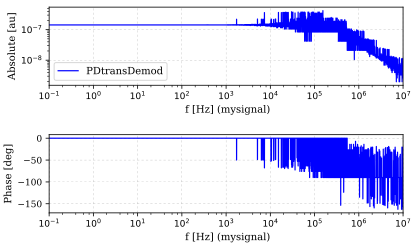

In [21]:
fig = out.plot()